In [19]:
import pprint
import json
import pandas as pd

In [196]:
f = open("disease_shex.json")
shex_results = json.load(f)

<AxesSubplot:>

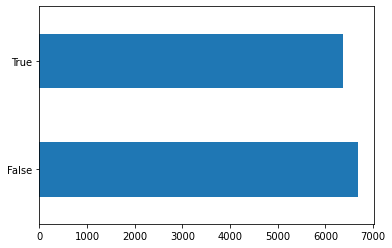

In [197]:
df["result"].value_counts().plot(kind='barh')

In [204]:
r2 = []
for index, row in df[df["result"]==False].iterrows():
    r = row["reason"].split("\n  Testing")
    for c in r:
        r2.append(c.split("\n"))
df2 = pd.DataFrame(r2).drop_duplicates()



In [201]:
df2

,0,1,2,3,4,5,6
0,Testing wd:Q12135 against shape #gene-wiki-d...,Testing s:Q12135-09ad8697-4e33-3086-adc0-d...,Testing wd:Q12136 against shape #gene-wi...,No matching triples found for predi...,None,None,None
1,wd:Q12135 against shape #gene-wiki-disease-item,Testing s:Q12135-09ad8697-4e33-3086-adc0-d...,Testing wd:Q12136 against shape #gene-wi...,No matching triples found for predi...,None,None,None
2,wd:Q12135 against shape #gene-wiki-disease-item,Testing s:Q12135-09ad8697-4e33-3086-adc0-d...,Testing wd:Q12136 against shape N075a9b3...,No matching triples found for predi...,None,None,None
3,wd:Q12135 against shape #gene-wiki-disease-item,Triples:,wd:Q12135 p:P699 s:Q12135-5251CD64-15DA-...,wd:Q12135 p:P699 s:Q12135-DDD25A09-18BB-...,"2 triples exceeds max {1,1}",None,None
18,wd:Q12135 against shape #gene-wiki-disease-item,No matching triples found for predicate...,None,None,None,None,None
...,...,...,...,...,...,...,...
65844,Testing wd:Q18558118 against shape #gene-wik...,Testing s:Q18558118-BCE95842-24FA-4E94-957...,Testing wd:Q145790 against shape #gene-w...,No matching triples found for predi...,None,None,None
65845,wd:Q18558118 against shape #gene-wiki-disease...,Testing s:Q18558118-BCE95842-24FA-4E94-957...,Testing wd:Q145790 against shape #gene-w...,No matching triples found for predi...,None,None,None
65846,wd:Q18558118 against shape #gene-wiki-disease...,Testing s:Q18558118-BCE95842-24FA-4E94-957...,Testing wd:Q145790 against shape N0767ba...,No matching triples found for predi...,None,None,None
65847,wd:Q18558118 against shape #gene-wiki-disease...,Testing s:Q18558118-088DAEB4-6DF5-4175-AE0...,No matching triples found for predica...,None,None,None,None


In [202]:
errors = dict()
for index, row in df2.iterrows():
    if row[0].startswith("  Testing"):
        qid = row[0].replace(" against shape #gene-wiki-disease-item", "").replace("  Testing wd:", "")
        if qid not in errors.keys():
            errors[qid] = []
    for i in range(len(row)-1):
        if i != len(row)-1:
            if row[i+1] == None:
                if row[i].strip() not in errors[qid]:
                    errors[qid].append(row[i].strip())
                break
print(len(lengte))      

6608


In [203]:
counts = dict()
for qid in errors.keys():
    for error in errors[qid]:
        if error not in counts.keys():
            counts[error] = 0
        counts[error]+=1
counts

{'No matching triples found for predicate p:P2888': 6608,
 'No matching triples found for predicate ps:P279': 6217,
 '2 triples exceeds max {1,1}': 3666,
 'No matching triples found for predicate prov:wasDerivedFrom': 2632,
 '{"values": ["http://www.wikidata.org/entity/Q5282129"], "typ...': 534,
 '{"values": ["http://www.wikidata.org/entity/Q27468140"], "ty...': 1304,
 'No matching triples found for predicate pr:P699': 772,
 '3 triples exceeds max {1,1}': 9,
 'No matching triples found for predicate pr:P5270': 1}

In [174]:
pprint.pprint(shex_results[0]["reason"])

('  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape N075a9b3ae3204a6eaff89e8a9e5e7806\n'
 '           No matching triples found for predicate ps:P279\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Triples:\n'
 '      wd:Q12135 p:P699 s:Q12135